<a href="https://colab.research.google.com/github/Shivansh1205/tumor-detection-ml-model/blob/main/tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

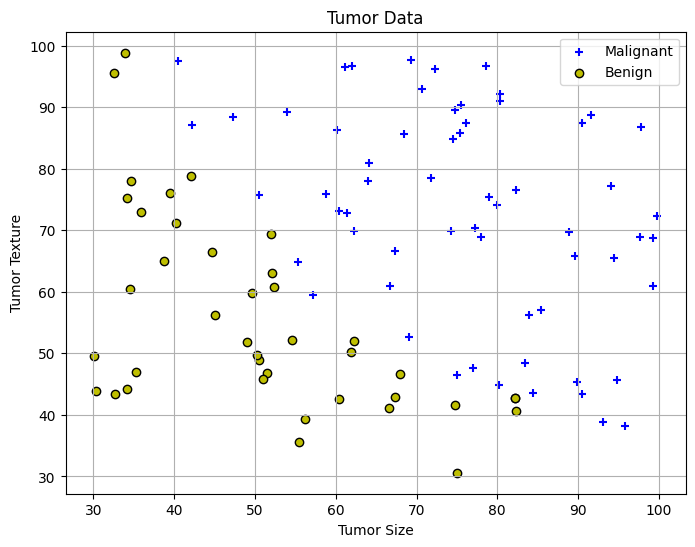

In [14]:
# Tumor Detection with Logistic Regression
# Based on Andrew Ng's Coursera Machine Learning Assignment

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Data
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

# Plot Data
def plot_data(X, y):
    pos = y == 1
    neg = y == 0
    plt.figure(figsize=(8,6))
    plt.scatter(X[pos, 0], X[pos, 1], c='b', marker='+', label='Malignant')
    plt.scatter(X[neg, 0], X[neg, 1], c='y', edgecolors='k', label='Benign')
    plt.xlabel('Tumor Size')
    plt.ylabel('Tumor Texture')
    plt.legend()
    plt.grid(True)
    plt.title("Tumor Data")
    plt.show()

plot_data(X, y)


In [15]:
# Add intercept term
X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))


In [16]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [17]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [18]:
print("Data shape:", data.shape)
print("Unique labels:", np.unique(y))


Data shape: (101, 3)
Unique labels: [0. 1.]


In [19]:
# Try with comma
try:
    data = np.loadtxt('ex2data1.txt', delimiter=',')
except:
    # Try with space
    data = np.loadtxt('ex2data1.txt', delimiter=' ')

# Show preview
print("First 5 rows:\n", data[:5])
X = data[:, 0:2]
y = data[:, 2]
print("Unique y labels:", np.unique(y))


First 5 rows:
 [[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]
Unique y labels: [0. 1.]


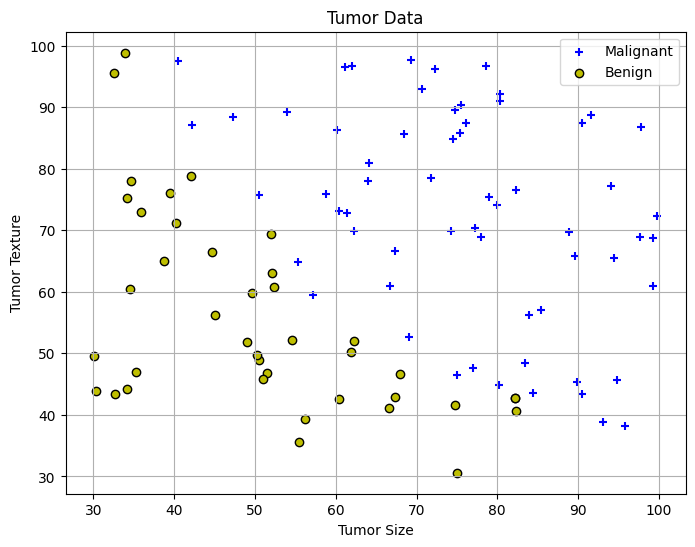

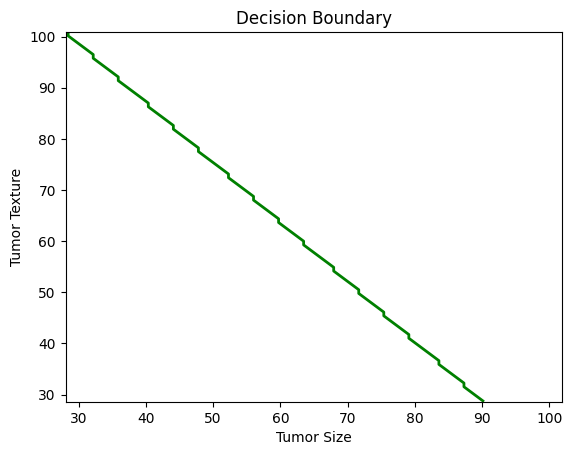

In [20]:
# Plot decision boundary
def plot_decision_boundary(model, X, y):
    plot_data(X, y)
    x_min, x_max = X[:, 0].min()-2, X[:, 0].max()+2
    y_min, y_max = X[:, 1].min()-2, X[:, 1].max()+2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='g')
    plt.title("Decision Boundary")
    plt.xlabel("Tumor Size")
    plt.ylabel("Tumor Texture")
    plt.show()

plot_decision_boundary(model, X, y)


In [21]:
# Predict for a new example
example = np.array([[45, 85]])
prob = model.predict_proba(example)[0][1]
print(f"Probability that tumor is malignant (size 45, texture 85): {prob:.4f}")


Probability that tumor is malignant (size 45, texture 85): 0.7259


In [22]:
# Accuracy on training set
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


Training Accuracy: 93.07%


In [23]:
# Accuracy on training set
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


Training Accuracy: 93.07%
